<a href="https://colab.research.google.com/github/sukritganesh/PythonProwess/blob/master/MusicMaker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import scipy.io.wavfile as wav
import IPython.display as ipd

# Created by Sukrit Ganesh
# Feel free to use any functions or replicate my code as you please

The following cell contains commonly used notes and chords. Add to the list as you please.

In [ ]:
DEFAULT_RATE = 44100

frequencyDict = {'0':0,
                 'C0':16.35, 'C0S':17.32, 'D0':18.35,
                 'B3':246.9,
                 'C4':261.6, 'C4S':277.2, 'D4': 293.7, 'E4F':311.1, 'E4':329.6,	'F4':349.2,	'F4S':370.0, 'G4':392.0, 'G4S':415.3, 'A4':440.0, 'B4F':466.2, 'B4':493.9,
                 'C5':523.3}

C4M_1 = ['C4','E4','G4']
C4M_2 = ['C4','F4','A4']
C4M_3 = ['B3','D4','G4']
C4M_4 = ['D4','F4','G4']

The following cell contains methods to generate music notes and chords.

In [ ]:
# Convert letter note to frequency
# No need to convert if note is already in frequency format
def getNoteFrequency(note):
  if (note in frequencyDict):
    return frequencyDict[note]
  return note


# Element-wise addition of an array of notes
# notes DO NOT have to be same size
# Notes must be numpy arrays
def addNotes(notes):
  # Pad all numpy arrays to maximum note length
  maxNoteLength = 0
  for note in notes:
    if (len(note) > maxNoteLength):
      maxNoteLength = len(note)
  
  paddedNotes = []
  for note in notes:
    paddedNotes.append(np.concatenate((note, np.zeros(maxNoteLength - len(note)))))

  # sum all the padded notes
  sum_note = np.zeros(len(paddedNotes[0]))
  for currIndex in range(len(paddedNotes[0])):
    for currNote in paddedNotes:
      sum_note[currIndex] += currNote[currIndex]
  return sum_note

# Plot a note
def plotNote(note, duration, rate=44100):
  plt.plot(np.linspace(0, duration, int(rate * duration)), note)

# Play a note
def playNote(note, rate=44100):
  ipd.Audio(note,rate=rate)

# Make a sine wave music note at a given frequency, duration, and rate (higher rates make clearer sound)
def makeSineNote(freq, duration=0.3, rate=44100, p_ramp=False):
  freq = getNoteFrequency(freq)
  nsamples = int(rate*duration)
  t = np.linspace(0, duration, nsamples)
  f = np.sin(freq*2*np.pi*t)
  if (p_ramp):
    ramp = np.linspace(0, 1, int(rate * duration))
    return f * ((1 - ramp) ** 2)
  return f

# Make a sine wave chord consisting of a variety of frequencies played at the same time
def makeSineChord(freqs, duration = 1, rate=44100, p_ramp=False):
  notes = []
  for i in freqs:
    notes.append(makeSineNote(i, duration=duration, rate=rate, p_ramp=p_ramp))
  return addNotes(notes)

# Make some music given an array of [frequencies]:duration pairs
def makeMusic(pairs, rate=44100, p_ramp=False):
  music = np.zeros(0)
  for pair in pairs:
    music = np.append(music, makeSineChord(pair[0], duration=pair[1], rate=rate, p_ramp=p_ramp))
  return music

Below is a sample song created with the MusicMaker. I composed the tune, which contains melodies from various popular songs, myself.

In [ ]:
# 80p song
m1 = [
           [['E4'],0.25],
           [['D4'],0.25],
]

m2 = [
           [['C4'],0.5],
           [['C4'],0.25],
           [['C4'],0.25],
           [['C4'],0.25],
           [['D4'],0.25],
           [['E4'],0.25],
           [['F4'],0.25],
           [['G4'],1.5],
           [['A4'],0.25],
           [['B4'],0.25],
]

m3 = [
           [['C5'],0.5],
           [['C5'],0.25],
           [['C5'],0.25],
           [['B4'],0.5],
           [['A4'],0.25],
           [['E4'],0.25],
           [['G4'],0.5],
           [['G4'],0.5],
           [['G4'],0.5],
           [['G4'],0.5],
]

m4 = [
      [['C5'],0.5],
      [['C5'],0.25],
      [['C5'],0.25],
      [['B4'],0.5],
      [['A4'],0.5],
      [['G4'],0.5],
      [['G4'],0.5],
      [['G4'],0.5],
      [['G4'],0.5],
]

m5 = [
      [['F4'],0.5],
      [['F4'],0.25],
      [['F4'],0.25],
      [['E4'],0.25],
      [['D4'],0.25],
      [['C4'],0.25],
      [['E4'],0.25],
      [['D4'],0.5],
      [['D4'],0.25],
      [['E4'],0.25],
      [['F4'],0.5],
      [['E4'],0.25],
      [['D4'],0.25],
]

m6 = [
      [['C4'],0.5],
      [['D4'],0.5],
      [['E4'],0.5],
      [['F4'],0.5],
      [['G4'],1.5],
      [['A4'],0.25],
      [['B4'],0.25],
]

m7 = [
      [['C5'],0.5],
      [['C5'],0.5],
      [['B4'],0.5],
      [['A4'],0.5],
      [['G4'],1.5],
      [['A4'],0.25],
      [['B4'],0.25],
]

m8 = [
      [['C5'],0.5],
      [['C5'],0.5],
      [['B4'],0.5],
      [['A4'],0.5],
      [['G4'],0.5],
      [['F4'],0.5],
      [['E4'],1.0],
]

m9 = [
      [['D4'],0.5],
      [['E4'],0.25],
      [['F4'],0.25],
      [['G4'],0.25],
      [['F4'],0.25],
      [['E4'],0.25],
      [['B3'],0.25],
      [['C4'],1.0],
]

h1 = [
      [['0'],0.5],
]

h2 = [
      [C4M_1,1.0],
      [C4M_1,1.0],
      [C4M_1,2.0],
]

h3 = [
      [C4M_2,1.0],
      [C4M_3,1.0],
      [C4M_1,2.0],
]

h4 = [
      [C4M_2,1.0],
      [C4M_3,1.0],
      [C4M_1,2.0],
]

h5 = [
      [C4M_4,1.0],
      [C4M_1,1.0],
      [C4M_3,1.0],
      [C4M_4,1.0],
]

h6 = [
      [C4M_1,1.0],
      [C4M_1,1.0],
      [C4M_1,2.0],
]

h7 = [
      [C4M_2,1.0],
      [C4M_3,1.0],
      [C4M_1,2.0],
]

h8 = [
      [C4M_2,1.0],
      [C4M_3,1.0],
      [C4M_1,1.0],
      [C4M_1,1.0],
]


h9 = [
      [C4M_3,1.0],
      [C4M_1,0.75],
      [C4M_4,0.25],
      [C4M_1,2.0],
]

melody = m1 + m2 + m3 + m4 + m5 + m6 + m7 + m8 + m9
harmony = h1 + h2 + h3 + h4 + h5 + h6 + h7 + h8 + h9
melodyMusic = makeMusic(melody,rate=DEFAULT_RATE,p_ramp=True)
harmonyMusic = makeMusic(harmony,rate=DEFAULT_RATE,p_ramp=True)
music = addNotes((melodyMusic,harmonyMusic))
ipd.Audio(music, rate=DEFAULT_RATE)

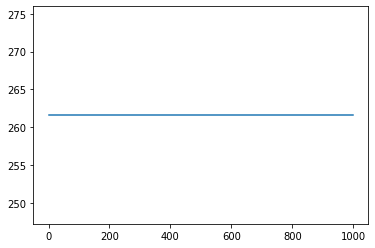

In [ ]:
n1 = makeSquareNote('C4', duration=1)
n2 = makeSquareNote('E4', duration=2, p_ramp=True)

ceChord = addNotes([n1, n2])
plt.plot(n1[:1000])
ipd.Audio(n1, rate=DEFAULT_RATE)